In [79]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
data = "data/Salesstore.csv"
df = pd.read_csv(data)
# df.head()
# df[df['Order_ID']==39364]

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
94,39364,High,29,2754.93,Regular Air,-1.33,Jamie Kunitz,Northwest Territories,Corporate,Furniture,Office Furnishings,"Deflect-o RollaMat Studded, Beveled Mat for Me...",Medium Box
422,39364,High,15,19417.55,Regular Air,8417.57,Jamie Kunitz,Northwest Territories,Corporate,Office Supplies,Binders and Binder Accessories,Fellowes PB500 Electric Punch Plastic Comb Bin...,Small Box


In [3]:
df.isnull().any()

Order_ID                False
Order_Priority          False
Order_Quantity          False
Sales                   False
Ship_Mode               False
Profit                  False
Customer_Name           False
Region                  False
Customer_Segment        False
Product_Category        False
Product_Sub-Category    False
Product_Name            False
Product_Container       False
dtype: bool

In [ ]:
#check duplication

In [96]:
df.duplicated().any()

False

In [ ]:
#check the data type of the dataFrame

In [169]:
print(df.dtypes)

Order_Quantity         int64
Sales                float64
Ship_Mode             object
Profit               float64
Customer_Name         object
Product_Name          object
Product_Container     object
dtype: object


In [97]:
df.columns

Index(['Order_ID', 'Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode',
       'Profit', 'Customer_Name', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Name',
       'Product_Container'],
      dtype='object')

In [ ]:
# Drop the Customer_Name column 

In [27]:
# df = df.drop('Customer_Name', axis=1)

### Data standarlizing

In [6]:
columns_to_capitalize = ['Order_Priority', 'Ship_Mode', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Name',
       'Product_Container']
df[columns_to_capitalize] = df[columns_to_capitalize].apply(lambda elm: elm.str.title())

## => What is the number of unique Order_priority?

In [40]:
nb_priority = df['Order_Priority'].nunique()
nb_priority

5

## => How many orders for each priority ?

In [58]:
nb_priority = df['Order_Priority'].value_counts()
nb_priority

Order_Priority
Not Specified    156
High             152
Low              147
Critical         147
Medium           128
Name: count, dtype: int64

### How many region there ?

In [21]:
regions = df['Region'].unique().tolist()
print(f"{len(regions)} :{regions}")

6 :['Nunavut', 'Northwest Territories', 'Atlantic', 'West', 'Ontario', 'Prarie']


### How many Customer_Segment are there?

In [22]:
segments = df['Customer_Segment'].unique().tolist()
print(f"{len(segments)} :{segments}")

4 :['Corporate', 'Consumer', 'Home Office', 'Small Business']


### How many Product_Catigorie exists?

In [28]:
products = df['Product_Category'].unique().tolist()
print(f"{len(products)} :{products}")

3 :['Office Supplies', 'Furniture', 'Technology']


### How many Product_Sub-Category are there?

In [101]:
sup_products = df['Product_Sub-Category'].nunique()
sup_products

15

In [100]:
sup_products = df['Product_Sub-Category'].unique().tolist()
sup_products

['Storage & Organization',
 'Office Furnishings',
 'Chairs & Chairmats',
 'Appliances',
 'Copiers And Fax',
 'Office Machines',
 'Tables',
 'Telephones And Communication',
 'Scissors, Rulers And Trimmers',
 'Labels',
 'Paper',
 'Binders And Binder Accessories',
 'Computer Peripherals',
 'Envelopes',
 'Pens & Art Supplies']

### what Region had the highest number of sales?

In [39]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by = 'Sales' , ascending=False)
region_sales

,Region,Sales
5,West,346001.4240
1,Northwest Territories,275140.7555
0,Atlantic,271205.1010
4,Prarie,86646.1360
3,Ontario,81727.7725
2,Nunavut,36306.4980


### what Product_Name sold the most?

In [38]:
product_quantity = df.groupby('Product_Name')['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending=False)
product_quantity

,Product_Name,Order_Quantity
9,2160I,147
359,Ti 36X Solar Scientific Calculator,140
7,12-1/2 Diameter Round Wall Clock,134
400,Xerox 1920,129
344,T28 World,126
...,...,...
134,"Dot Matrix Printer Tape Reel Labels, White, 50...",1
279,Office Impressions Heavy Duty Welded Shelving ...,1
142,Eldon Cleatmat® Chair Mats For Medium Pile Car...,1
187,Gbc Docubind Tl200 Manual Binding Machine,1


### wich categorie had the highest/lowest profit?

In [43]:
category_profit = df.groupby('Product_Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending=False)
category_profit

,Product_Category,Profit
2,Technology,81368.05
1,Office Supplies,53073.95
0,Furniture,17017.84


### wich sub_categorie had the highest/lowest profit?

In [44]:
sub_category_profit = df.groupby('Product_Sub-Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending=False)
sub_category_profit

,Product_Sub-Category,Profit
14,Telephones And Communication,47992.17
8,Office Machines,26832.43
1,Binders And Binder Accessories,26291.74
0,Appliances,22731.86
2,Chairs & Chairmats,12164.94
7,Office Furnishings,8700.26
5,Envelopes,6049.97
3,Computer Peripherals,4982.06
9,Paper,3124.64
4,Copiers And Fax,1561.39


### what is the Customer_Segment that had a highest/lowest sales?

In [51]:
segment_hight_sales = df.groupby('Customer_Segment')['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending=False)
segment_hight_sales

,Customer_Segment,Sales
1,Corporate,805343.1240
0,Consumer,186041.2210
2,Home Office,70363.1295
3,Small Business,35280.2125


### what is the Customer_Segment that had a highest/lowest profits?

In [52]:
segment_hight_profit = df.groupby('Customer_Segment')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending=False)
segment_hight_profit

,Customer_Segment,Profit
1,Corporate,120106.44
0,Consumer,18641.47
2,Home Office,11619.34
3,Small Business,1092.59


### how many times we have the same nomber of order_quantity (wich quantity is popular)?

In [75]:
popular_qnt = df.groupby('Order_Quantity').size().reset_index()
# popular_qnt = popular_qnt.rename(columns={'Order_Quantity': 'Order_Quantity', 0: 'freq'})
popular_qnt.columns=['Order_Quantity', 'freq']
popular_qnt = popular_qnt.sort_values(by = 'freq',ascending=False)
popular_qnt.head()

,Order_Quantity,freq
41,42,24
14,15,23
7,8,22
24,25,21
35,36,21


### how many customers belong to each segment?

In [104]:
customers_of_segment = df.groupby('Customer_Segment').count()
customers_of_segment

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Product_Category,Product_Sub-Category,Product_Name,Product_Container
Customer_Segment,,,,,,,,,,,,
Consumer,153,153,153,153,153,153,153,153,153,153,153,153
Corporate,518,518,518,518,518,518,518,518,518,518,518,518
Home Office,31,31,31,31,31,31,31,31,31,31,31,31
Small Business,28,28,28,28,28,28,28,28,28,28,28,28


In [54]:
segment_customers = df.groupby('Customer_Segment')['Order_ID'].nunique().reset_index()
segment_customers

,Customer_Segment,Order_ID
0,Consumer,126
1,Corporate,390
2,Home Office,30
3,Small Business,25


### what is the ranking of loyal customers?

In [105]:
order_id_counts = df['Order_ID'].value_counts().reset_index()
order_id_counts.columns = ['Order_ID', 'Frequency']
loyal_Cutomers_Ranking = pd.merge(order_id_counts, df[['Order_ID', 'Customer_Name']], on='Order_ID', how='left').drop_duplicates()
loyal_Cutomers_Ranking

,Order_ID,Frequency,Customer_Name
0,24132,6,Justin Knight
6,8995,4,Beth Paige
10,47846,4,Hilary Holden
14,32611,3,Neil Knudson
17,8992,3,Shahid Shariari
...,...,...,...
725,35908,1,Brad Eason
726,35584,1,Joel Jenkins
727,33255,1,Russell Applegate
728,28420,1,Bill Donatelli


### Identify Order_IDs with exceptionally high Profit and the common features among them. 

In [80]:
Hight_Order_ID_Profit = df.groupby('Order_ID')[['Profit','Order_Quantity']].sum().reset_index()
Hight_Order_ID_Profit.sort_values(by = 'Profit', ascending= False)

,Order_ID,Profit,Order_Quantity
374,39364,8416.24,44
201,21383,7416.43,31
291,30658,5965.11,79
390,41059,5459.88,71
127,12419,5322.14,12
...,...,...,...
418,44320,-1640.51,49
66,6116,-1759.58,6
397,41696,-2088.68,45
306,32199,-3161.58,41


In [81]:
# indexing the data Frame
df.set_index(['Region','Customer_Segment','Product_Category','Product_Sub-Category','Order_Priority','Order_ID'] , inplace= True)

In [82]:
df = df.sort_index()
df

Order_Quantity  \
Region   Customer_Segment Product_Category Product_Sub-Category         Order_Priority Order_ID                   
Atlantic Consumer         Furniture        Office Furnishings           Critical       35558                  2   
                                                                                       58055                 26   
                                                                        Not Specified  21223                  8   
                                           Tables                       Critical       53894                 37   
                          Office Supplies  Appliances                   High           54304                 11   
...                                                                                                         ...   
West     Small Business   Office Supplies  Appliances                   Medium         31941                 32   
                                           Paper                        High           5504                   6   
                          Technology       Computer Peripherals         High           32871                 42   
                                           Telephones and Communication Critical       2720                  36   
                                                                                       54560                 45   

                                                                                                    Sales  \
Region   Customer_Segment Product_Category Product_Sub-Category         Order_Priority Order_ID             
Atlantic Consumer         Furniture        Office Furnishings           Critical       35558       34.880   
                                                                                       58055      208.600   
                                                                        Not Specified  21223      435.290   
                                           Tables                       Critical       53894     2756.170   
                          Office Supplies  Appliances                   High           54304      558.620   
...                                                                                                   ...   
West     Small Business   Office Supplies  Appliances                   Medium         31941     2564.450   
                                           Paper                        High           5504        49.550   
                          Technology       Computer Peripherals         High           32871      939.770   
                                           Telephones and Communication Critical       2720      2051.016   
                                                                                       54560     2404.599   

                                                                                                   Ship_Mode  \
Region   Customer_Segment Product_Category Product_Sub-Category         Order_Priority Order_ID                
Atlantic Consumer         Furniture        Office Furnishings           Critical       35558     Regular Air   
                                                                                       58055     Regular Air   
                                                                        Not Specified  21223     Regular Air   
                                           Tables                       Critical       53894     Regular Air   
                          Office Supplies  Appliances                   High           54304     Regular Air   
...                                                                                                      ...   
West     Small Business   Office Supplies  Appliances                   Medium         31941     Express Air   
                                           Paper                        High           5504      Express Air   
                          Technology       Computer Peripherals

In [64]:
region_avg_sales = df.groupby(level= 'Region')[['Sales','Order_Quantity','Profit']].mean()
region_avg_sales = region_avg_sales.sort_values(by = 'Sales')
region_avg_profit = region_avg_sales.sort_values(by = 'Profit')
region_avg_order_quantity = region_avg_sales.sort_values(by = 'Order_Quantity')

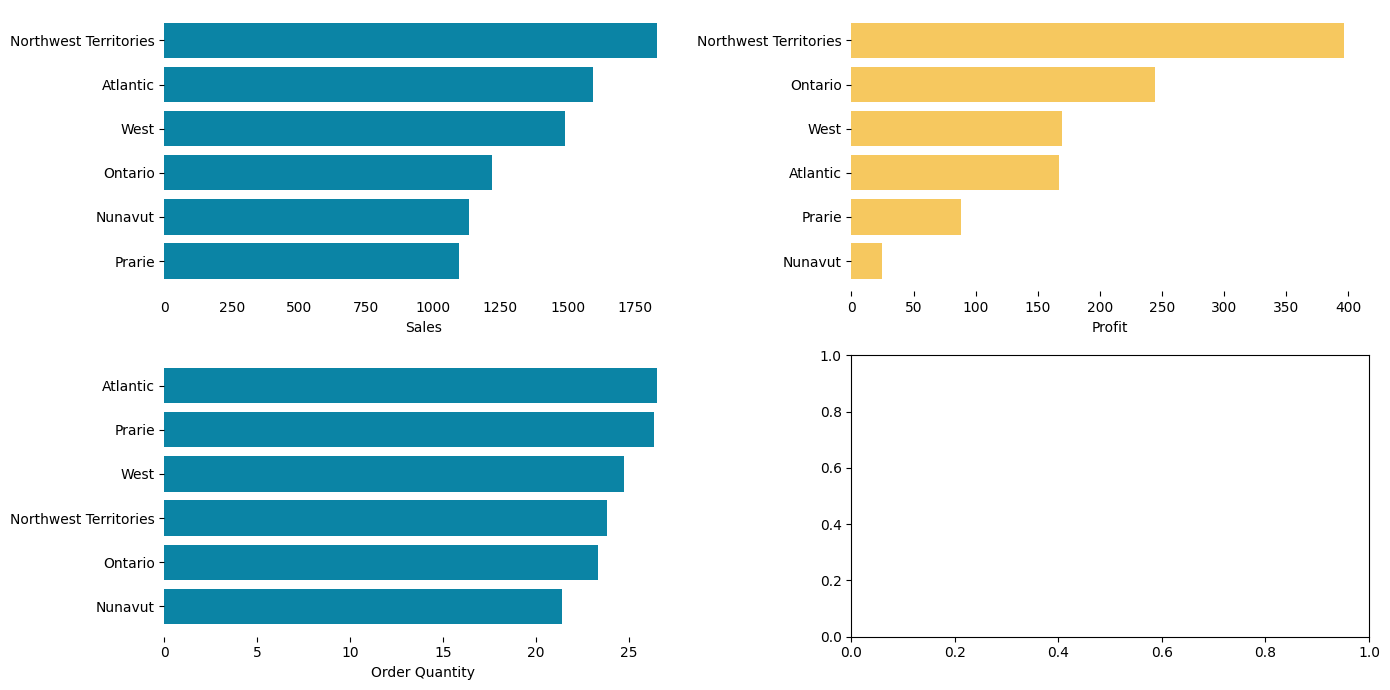

In [79]:
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

axs[0,0].barh(region_avg_sales.index, region_avg_sales['Sales'], color='#0B84A5')
axs[0,0].set_xlabel('Sales')
axs[0, 0].spines[['top', 'right', 'bottom', 'left']].set_visible(False)
axs[0,0].xaxis.set_ticks_position('none')

# axs[0].set_title('Sales by Region')
axs[0,1].barh(region_avg_profit.index, region_avg_profit['Profit'], color='#F6C85F')
axs[0,1].set_xlabel('Profit')
axs[0, 1].spines[['top', 'right', 'bottom', 'left']].set_visible(False)

# axs[1].set_title('Profit by Region')
axs[1,0].barh(region_avg_order_quantity.index, region_avg_order_quantity['Order_Quantity'], color='#0B84A5')
axs[1,0].set_xlabel('Order Quantity')
axs[1, 0].spines[['top', 'right', 'bottom', 'left']].set_visible(False)



plt.tight_layout()
plt.show()

### The proportion of Sales, Profit, And Order_Quantity for each Customer_Segment in each Region :

In [189]:
avg_segment_region = df.groupby(level= ['Region','Customer_Segment'])[['Sales','Order_Quantity','Profit']].sum().reset_index()
avg_segment_region.head()

,Region,Customer_Segment,Sales,Order_Quantity,Profit
0,Atlantic,Consumer,44459.2280,1103,2185.68
1,Atlantic,Corporate,191065.3360,3091,16399.41
2,Atlantic,Home Office,22196.9295,159,7191.46
3,Atlantic,Small Business,13483.6075,155,2616.73
4,Northwest Territories,Consumer,39093.3445,579,10358.28


In [201]:
region_sales_sum = avg_segment_region.groupby('Region')[['Sales','Profit']].sum().reset_index()
region_sales_sum.columns = ['Region','Total_Sales','Total_Profit']
region_sales_sum

,Region,Total_Sales,Total_Profit
0,Atlantic,271205.1010,28393.28
1,Northwest Territories,275140.7555,59551.86
2,Nunavut,36306.4980,780.71
3,Ontario,81727.7725,16375.46
4,Prarie,86646.1360,6944.32
5,West,346001.4240,39414.21


In [205]:
sales_percentage_segment = pd.merge(avg_segment_region,region_sales_sum,on='Region',how='left')
sales_percentage_segment['Segment_Sales_%'] = sales_percentage_segment['Sales'] / sales_percentage_segment['Total_Sales'] * 100
# sales_percentage_segment['Segment_Profit_%'] = sales_percentage_segment['Profit'] / sales_percentage_segment['Total_Profit'] * 100
sales_percentage_segment.head()

,Region,Customer_Segment,Sales,Order_Quantity,Profit,Total_Sales,Total_Profit,Region_Sales_%,Segment_Sales_%
0,Atlantic,Consumer,44459.2280,1103,2185.68,271205.1010,28393.28,24.721810,16.393212
1,Atlantic,Corporate,191065.3360,3091,16399.41,271205.1010,28393.28,24.721810,70.450495
2,Atlantic,Home Office,22196.9295,159,7191.46,271205.1010,28393.28,24.721810,8.184555
3,Atlantic,Small Business,13483.6075,155,2616.73,271205.1010,28393.28,24.721810,4.971738
4,Northwest Territories,Consumer,39093.3445,579,10358.28,275140.7555,59551.86,25.080566,14.208489


In [203]:
sales_percentage_region = region_sales_sum
sales_percentage_region['Region_Sales_%'] = sales_percentage_region['Total_Sales'] / df['Sales'].sum() * 100
# sales_percentage_region['Region_Profit_%'] = sales_percentage_region['Total_Sales'] / df['Profit'].sum() * 100
sales_percentage_region

,Region,Total_Sales,Total_Profit,Region_Sales_%
0,Atlantic,271205.1010,28393.28,24.721810
1,Northwest Territories,275140.7555,59551.86,25.080566
2,Nunavut,36306.4980,780.71,3.309533
3,Ontario,81727.7725,16375.46,7.449928
4,Prarie,86646.1360,6944.32,7.898263
5,West,346001.4240,39414.21,31.539899


### The proportion of Sales, Profit, And Order_Quantity for each Product_Categorie
### and Sub_categorie in each Region :

In [209]:
Sales_Segment_Category_sum = df.groupby(level= ['Region','Customer_Segment','Product_Category'])[['Sales','Order_Quantity','Profit']].sum().reset_index()
Sales_Segment_Category_sum.head()

,Region,Customer_Segment,Product_Category,Sales,Order_Quantity,Profit
0,Atlantic,Consumer,Furniture,3434.940,73,-1517.88
1,Atlantic,Consumer,Office Supplies,31471.110,857,2940.71
2,Atlantic,Consumer,Technology,9553.178,173,762.85
3,Atlantic,Corporate,Furniture,29126.060,551,1501.81
4,Atlantic,Corporate,Office Supplies,42326.520,1663,6481.80


In [211]:
Sales_Region_Category_sum = df.groupby(level= ['Region','Customer_Segment'])[['Sales','Profit']].sum().reset_index()
Sales_Region_Category_sum.columns = ['Region','Customer_Segment','Total_Sales','Total_Profit']
Sales_Region_Category_sum

,Region,Customer_Segment,Total_Sales,Total_Profit
0,Atlantic,Consumer,44459.2280,2185.68
1,Atlantic,Corporate,191065.3360,16399.41
2,Atlantic,Home Office,22196.9295,7191.46
3,Atlantic,Small Business,13483.6075,2616.73
4,Northwest Territories,Consumer,39093.3445,10358.28
5,Northwest Territories,Corporate,223399.5310,50424.42
6,Northwest Territories,Home Office,7344.2400,1253.39
7,Northwest Territories,Small Business,5303.6400,-2484.23
8,Nunavut,Consumer,2668.0300,160.40
9,Nunavut,Corporate,33220.8380,558.30


In [217]:
Sales_Percentage_Category = pd.merge(Sales_Segment_Category_sum, Sales_Region_Category_sum, on= ['Region','Customer_Segment'], how= 'left')
Sales_Percentage_Category.head()

,Region,Customer_Segment,Product_Category,Sales,Order_Quantity,Profit,Total_Sales,Total_Profit
0,Atlantic,Consumer,Furniture,3434.940,73,-1517.88,44459.228,2185.68
1,Atlantic,Consumer,Office Supplies,31471.110,857,2940.71,44459.228,2185.68
2,Atlantic,Consumer,Technology,9553.178,173,762.85,44459.228,2185.68
3,Atlantic,Corporate,Furniture,29126.060,551,1501.81,191065.336,16399.41
4,Atlantic,Corporate,Office Supplies,42326.520,1663,6481.80,191065.336,16399.41
